Background

The target function is Conditional Average Treatment Effect, defined as 

$$ g(x)=E [ Y(1) - Y(0) |X=x], $$ 

where $Y(1)$ and $Y(0)$ are potential outcomes in treated and control group. In our case, $Y(1)$ is the potential Net Financial Assets if a subject is eligible for 401(k), and $Y(0)$ is the potential Net Financial Assets if a subject is ineligible. $X$ is a covariate of interest, in this case, income.
$ g(x)$ shows expected effect of eligibility on NET TFA for a subject whose income level is $x$.



If eligibility indicator is independent of $Y(1), Y(0)$, given pre-401-k assignment characteristics $Z$, the function can expressed in terms of observed data (as opposed to hypothetical, or potential outcomes). Observed data consists of  realized NET TFA $Y = D Y(1) + (1-D) Y(0)$, eligibility indicator $D$, and covariates $Z$ which includes $X$, income. The expression for $g(x)$ is

$$ g(x) = E [ Y (\eta_0) \mid X=x], $$
where the transformed outcome variable is

$$Y (\eta) = \dfrac{D}{s(Z)} \left( Y - \mu(1,Z) \right) - \dfrac{1-D}{1-s(Z)} \left( Y - \mu(0,Z) \right) + \mu(1,Z) - \mu(0,Z),$$

the probability of eligibility is 

$$s_0(z) = Pr (D=1 \mid Z=z),$$ 

the expected net financial asset given $D =d \in \{1,0\}$ and $Z=z$ is

$$ \mu(d,z) = E[ Y \mid Z=z, D=d]. $$

Our goal is to estimate $g(x)$.


In step 1, we estimate the unknown functions $s_0(z),  \mu(1,z),  \mu(0,z)$ and plug them into $Y (\eta)$.


In step 2, we approximate the function $g(x)$ by a linear combination of basis functions:

$$ g(x) = p(x)' \beta_0, $$


where $p(x)$ is a vector of polynomials or splines and

$$ \beta_0 = (E p(X) p(X))^{-1} E p(X) Y (\eta_0) $$

is the best linear predictor. We report

$$
\widehat{g}(x) = p(x)' \widehat{\beta},
$$

where $\widehat{\beta}$ is the ordinary least squares estimate of $\beta_0$ defined on the random sample $(X_i, D_i, Y_i)_{i=1}^N$

$$
	\widehat{\beta} :=\left( \dfrac{1}{N} \sum_{i=1}^N p(X_i) p(X_i)' \right)^{-1} \dfrac{1}{N} \sum_{i=1}^N  p(X_i)Y_i(\widehat{\eta})
$$








In [7]:
## load packages
rm(list=ls())
library(foreign)
library(quantreg)
library(splines)
library(lattice)
#library(mnormt);
library(Hmisc)
library(fda);
library(hdm)
library(randomForest)
library(ranger)
library(sandwich)

In [22]:
## 401k dataset
data(pension)
pension
save(pension, file = "C:/Users/MSI-NB/Documents/GitHub/14.38_Causal_ML/data/pension.RData")

ira,a401,hval,hmort,hequity,nifa,net_nifa,tfa,net_tfa,tfa_he,...,i3,i4,i5,i6,i7,a1,a2,a3,a4,a5
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,69000,60150,8850,100,-3300,100,-3300,5550,...,1,0,0,0,0,0,1,0,0,0
0,0,78000,20000,58000,61010,61010,61010,61010,119010,...,0,1,0,0,0,0,0,0,1,0
1800,0,200000,15900,184100,7549,7049,9349,8849,192949,...,0,0,0,1,0,0,0,0,1,0
0,0,0,0,0,2487,-6013,2487,-6013,-6013,...,0,0,1,0,0,1,0,0,0,0
0,0,300000,90000,210000,10625,-2375,10625,-2375,207625,...,0,1,0,0,0,0,0,1,0,0
0,0,120000,99600,20400,9000,-11000,9000,-11000,9400,...,0,0,0,0,1,0,0,0,1,0
0,0,89000,63000,26000,1099,-16901,1099,-16901,9099,...,0,0,0,1,0,0,0,1,0,0
0,0,0,0,0,1700,1000,1700,1000,1000,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
pension$net_tfa<-pension$net_tfa/10000
dim(pension)

[1] 9910   44

In [10]:
pension$net_tfa<-pension$net_tfa/10000
## covariate of interest -- log income -- 
pension$inc = log(pension$inc)
#pension$inc[is.na(pension$inc)]<-0
pension<-pension[!is.na(pension$inc) & pension$inc!=-Inf & pension$inc !=Inf,]


## outcome variable -- total net financial assets
Y=pension$net_tfa
## binary treatment --  indicator of 401(k) eligibility
D=pension$e401


X=pension$inc


## raw covariates so that Y(1) and Y(0) are independent of D given Z
Z = pension[,c("age","inc","fsize","educ","male","db","marr","twoearn","pira","hown","hval","hequity","hmort",
              "nohs","hs","smcol")]


y_name   <- "net_tfa";
d_name    <- "e401";
form_z    <- "(poly(age, 6) + poly(inc, 8) + poly(educ, 4) + poly(fsize,2) + as.factor(marr) + as.factor(twoearn) + as.factor(db) + as.factor(pira) + as.factor(hown))^2";



cat(sprintf("\n sample size is %g \n", length(Y) ))
cat(sprintf("\n num raw covariates z is %g \n", dim(Z)[2] ))

Warning message in log(pension$inc):
"NaNs produced"



 sample size is 9910 

 num raw covariates z is 16 


In Step 1, we estimate three functions:

1. probability of treatment assignment $s_0(z)$ 

2.-3. regression functions $\mu_0(1,z)$ and $\mu_0(0,z)$.  

We use the cross-fitting procedure with $K=2$ holds. For definition of cross-fitting with $K$ folds, check the sample splitting in ```DML2.for.PLM``` function defined in https://www.kaggle.com/victorchernozhukov/debiased-ml-for-partially-linear-model-in-r

For each function, we try random forest.


First Stage: estimate $\mu_0(1,z)$ and $\mu_0(0,z)$ and $s_0(z)$ by lasso

In [3]:

first_stage_lasso<-function(data,d_name,y_name, form_z, seed=1) {

  # Sample size
  N<-dim(data)[1]
  # Estimated regression function in control group
  mu0.hat<-rep(1,N) 
  # Estimated regression function in treated group
  mu1.hat<-rep(1,N) 
  # Propensity score
  s.hat<-rep(1,N)
  seed=1
  ## define sample splitting
  set.seed(seed)
  inds.train=sample(1:N,floor(N/2))
  inds.eval=setdiff(1:N,inds.train)

  print ("Estimate treatment probability, first half")
  ## conditional probability of 401 k eligibility (i.e., propensity score) based on random forest
  fitted.lasso.pscore<-rlassologit(as.formula(paste0(d_name,"~",form_z )),data=data[inds.train,])

  s.hat[inds.eval]<-predict(fitted.lasso.pscore,data[inds.eval,],type="response")
  print ("Estimate treatment probability, second half")
  fitted.lasso.pscore<-rlassologit(as.formula(paste0(d_name,"~",form_z )),data=data[inds.eval,])
  s.hat[inds.train]<-predict( fitted.lasso.pscore,data[inds.train,],type="response")





  data1<-data
  data1[,d_name]<-1

  data0<-data
  data0[,d_name]<-0

  print ("Estimate expectation function, first half") 
  fitted.lasso.mu<-rlasso(as.formula(paste0(y_name,"~",d_name,"+(",form_z,")" )),data=data[inds.train,])
  mu1.hat[inds.eval]<-predict( fitted.lasso.mu,data1[inds.eval,])
  mu0.hat[inds.eval]<-predict( fitted.lasso.mu,data0[inds.eval,]) 
  
  print ("Estimate expectation function, second half") 
  fitted.lasso.mu<-rlasso(as.formula(paste0(y_name,"~",d_name,"+(",form_z,")" )),data=data[inds.eval,])
  mu1.hat[inds.train]<-predict( fitted.lasso.mu,data1[inds.train,])
  mu0.hat[inds.train]<-predict( fitted.lasso.mu,data0[inds.train,]) 
 
  return (list(mu1.hat=mu1.hat,
              mu0.hat=mu0.hat,
              s.hat=s.hat))
    
}

First Stage: estimate $\mu_0(1,z)$ and $\mu_0(0,z)$ and $s_0(z)$ by random forest

In [4]:
first_stage_rf<-function(Y,D,X,Z,seed=1) {

  # Sample size
  N<-length(D)
  # Estimated regression function in control group
  mu0.hat<-rep(1,N) 
  # Estimated regression function in treated group
  mu1.hat<-rep(1,N) 
  # Propensity score
  s.hat<-rep(1,N)
    
    
  ## define sample splitting
   set.seed(seed)
  inds.train=sample(1:N,floor(N/2))
  inds.eval=setdiff(1:N,inds.train)

    print ("Estimate treatment probability, first half")
  ## conditional probability of 401 k eligibility (i.e., propensity score) based on random forest
    D.f<-as.factor(as.character(D))
   fitted.rf.pscore<-randomForest(Z,D.f,subset=inds.train)
   s.hat[inds.eval]<-predict(fitted.rf.pscore,Z[inds.eval,],type="prob")[,2]
    print ("Estimate treatment probability, second half")
   fitted.rf<-randomForest(Z,D.f,subset=inds.eval) 
    s.hat[inds.train]<-predict(fitted.rf.pscore,Z[inds.train,],type="prob")[,2]
    
  ## conditional expected net financial assets (i.e.,  regression function) based on random forest
  
  covariates<-cbind(Z,D)
    
  covariates1<-cbind(Z,D=rep(1,N))
  covariates0<-cbind(Z,D=rep(0,N))
  
  print ("Estimate expectation function, first half") 
  fitted.rf.mu<-randomForest(cbind(Z,D),Y,subset=inds.train)
  mu1.hat[inds.eval]<-predict( fitted.rf.mu,covariates1[inds.eval,])
  mu0.hat[inds.eval]<-predict( fitted.rf.mu,covariates0[inds.eval,]) 
  
  print ("Estimate expectation function, second half") 
   fitted.rf.mu<-randomForest(cbind(Z,D),Y,subset=inds.eval) 
   mu1.hat[inds.train]<-predict( fitted.rf.mu,covariates1[inds.train,])
   mu0.hat[inds.train]<-predict( fitted.rf.mu,covariates0[inds.train,]) 
 
  return (list(mu1.hat=mu1.hat,
              mu0.hat=mu0.hat,
              s.hat=s.hat))
    
}

In Step 2, we approximate $Y(\eta_0)$ by a vector of basis functions. There are two use cases:
****
2.A. Group Average Treatment Effect, described above


2.B. Average Treatment Effect conditional on income value. There are three smoothing options:

1. splines offered in ```least_squares_splines```

2. orthogonal polynomials with the highest degree chosen by cross-validation ```least_squares_series```

3. standard polynomials with the highest degree input by user ```least_squares_series_old```


The default option is option 3.

2.A. The simplest use case of Conditional Average Treatment Effect is GATE, or Group Average Treatment Effect. Partition the support of income as

$$ - \infty = \ell_0 < \ell_1 < \ell_2 \dots \ell_K = \infty $$

define intervals $I_k = [ \ell_{k-1}, \ell_{k})$. Let $X$ be income covariate. For $X$, define a group indicator 

$$ G_k(X) = 1[X \in I_k], $$

and the vector of basis functions 

$$ p(X) = (G_1(X), G_2(X), \dots, G_K(X)) $$

Then, the Best Linear Predictor $\beta_0$ vector shows the average treatment effect for each group.

In [5]:
## estimate first stage functions by random forest
## may take a while
fs.hat.rf = first_stage_rf(Y,D,X,Z)

[1] "Estimate treatment probability, first half"
[1] "Estimate treatment probability, second half"
[1] "Estimate expectation function, first half"
[1] "Estimate expectation function, second half"


In [6]:
X=pension$inc
fs.hat<-fs.hat.rf
min_cutoff=0.01
# regression function
mu1.hat<-fs.hat[["mu1.hat"]]
mu0.hat<-fs.hat[["mu0.hat"]]
# propensity score
s.hat<-fs.hat[["s.hat"]]
s.hat<-sapply(s.hat,max,min_cutoff)
### Construct Orthogonal Signal 


RobustSignal<-(Y - mu1.hat)*D/s.hat - (Y - mu0.hat)*(1-D)/(1-s.hat) + mu1.hat - mu0.hat

In [7]:
qtmax <- function(C, S=10000, alpha)
  {;
   p <- nrow(C);
   tmaxs <- apply(abs(matrix(rnorm(p*S), nrow = p, ncol = S)), 2, max);
   return(quantile(tmaxs, 1-alpha));
  };

# This function computes the square root of a symmetric matrix using the spectral decomposition;


group_average_treatment_effect<-function(X,Y,max_grid=5,alpha=0.05, B=10000) {
    
 grid<-quantile(X,probs=c((0:max_grid)/max_grid))
 X.raw<-matrix(NA, nrow=length(Y),ncol=length(grid)-1) 
    
 for (k in 2:((length(grid)))) {
       X.raw[,k-1]<-sapply(X, function (x) ifelse (x>=grid[k-1] & x<grid[k],1,0) )
 }
 k=length(grid)
 X.raw[,k-1]<-sapply(X, function (x) ifelse (x>=grid[k-1] & x<=grid[k],1,0) )
                                  
 ols.fit<- lm(Y~X.raw-1)
 coefs   <- coef(ols.fit)
 vars <- names(coefs)
 HCV.coefs <- vcovHC(ols.fit, type = 'HC')
 coefs.se <- sqrt(diag(HCV.coefs)) # White std errors
 ## this is an identity matrix
                     ## qtmax is simplified
 C.coefs  <- (diag(1/sqrt(diag(HCV.coefs)))) %*% HCV.coefs %*% (diag(1/sqrt(diag(HCV.coefs))));                    
                 
                     
 tes  <- coefs
 tes.se <- coefs.se
 tes.cor <- C.coefs
 crit.val <- qtmax(tes.cor,B,alpha);
                     
 tes.ucb  <- tes + crit.val * tes.se;
 tes.lcb  <- tes - crit.val * tes.se;

 tes.uci  <- tes + qnorm(1-alpha/2) * tes.se;
 tes.lci  <- tes + qnorm(alpha/2) * tes.se;

                     
 return(list(beta.hat=coefs, ghat.lower.point=tes.lci, ghat.upper.point=tes.uci,
           ghat.lower=tes.lcb, ghat.upper= tes.ucb, crit.val=crit.val ))
}

In [8]:
res<-group_average_treatment_effect(X=X,Y=RobustSignal)

null device 
          1

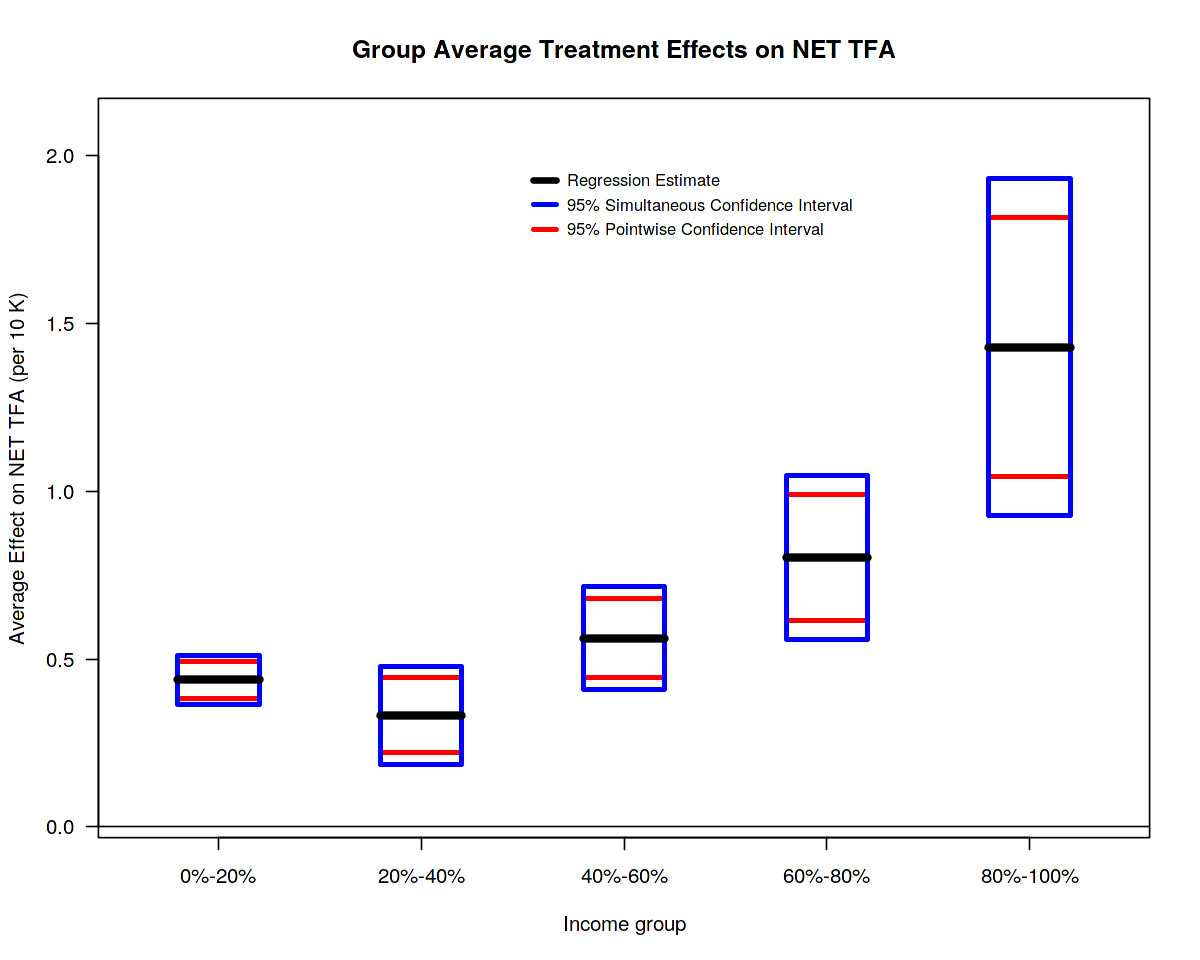

In [9]:
## this code is taken from L1 14.382 taught at MIT
## author: Mert Demirer
options(repr.plot.width=10, repr.plot.height=8)

tes<-res$beta.hat
tes.lci<-res$ghat.lower.point
tes.uci<-res$ghat.upper.point

tes.lcb<-res$ghat.lower
tes.ucb<-res$ghat.upper
tes.lev<-c('0%-20%', '20%-40%','40%-60%','60%-80%','80%-100%')

plot( c(1,5), las = 2, xlim =c(0.6, 5.4), ylim = c(.05, 2.09),  type="n",xlab="Income group", 
     ylab="Average Effect on NET TFA (per 10 K)", main="Group Average Treatment Effects on NET TFA", xaxt="n");
axis(1, at=1:5, labels=tes.lev);
for (i in 1:5)
{;
 rect(i-0.2, tes.lci[i], i+0.2,  tes.uci[i], col = NA,  border = "red", lwd = 3);    
 rect(i-0.2, tes.lcb[i], i+0.2, tes.ucb[i], col = NA,  border = 4, lwd = 3 );   
 segments(i-0.2, tes[i], i+0.2, tes[i], lwd = 5 );
};
abline(h=0);

legend(2.5, 2.0, c('Regression Estimate', '95% Simultaneous Confidence Interval', '95% Pointwise Confidence Interval'), col = c(1,4,2), lwd = c(4,3,3), horiz = F, bty = 'n', cex=0.8);

dev.off()

In [10]:
least_squares_splines<-function(X,Y,max_knot,norder,nderiv,...) {
  ## Create technical regressors
    cv.bsp<-rep(0,max_knot-1)
    for (knot in 2:max_knot) {
      breaks<- quantile(X, c(0:knot)/knot)
      formula.bsp 	<- Y ~ bsplineS(X, breaks =breaks, norder = norder, nderiv = nderiv)[ ,-1]
      fit	<- lm(formula.bsp);
      cv.bsp[knot-1]		<- sum( (fit$res / (1 - hatvalues(fit)) )^2);
    }
    ## Number of knots chosen by cross-validation
    cv_knot<-which.min(cv.bsp)+1
     breaks<- quantile(X, c(0:cv_knot)/cv_knot)
   formula.bsp 	<- Y ~ bsplineS(X, breaks =breaks, norder = norder, nderiv = 0)[ ,-1]
   fit	<- lm(formula.bsp); 
   
    
   return(list(cv_knot=cv_knot,fit=fit))
}


least_squares_series<-function(X, Y,max_degree,...) {
 
  cv.pol<-rep(0,max_degree)
  for (degree in 1:max_degree) {
    formula.pol 	<- Y ~ poly(X, degree)
    fit	<- lm(formula.pol );
    cv.pol[degree]		<- sum( (fit$res / (1 - hatvalues(fit)) )^2);
  }
  ## Number of knots chosen by cross-validation
  cv_degree<-which.min(cv.pol)
  ## Estimate coefficients
  formula.pol 	<- Y ~ poly(X, cv_degree)
  fit	<- lm(formula.pol);
    
    
  return(list(fit=fit,cv_degree=cv_degree))
}



In [11]:
msqrt <- function(C)
  {;
  C.eig <- eigen(C);
  return(C.eig$vectors %*% diag(sqrt(C.eig$values)) %*% solve(C.eig$vectors));
  };


tboot<-function(regressors_grid, Omega.hat ,alpha, B=10000) {
  
    
   numerator_grid<-regressors_grid%*%msqrt( Omega.hat)
   denominator_grid<-sqrt(diag(regressors_grid%*% Omega.hat%*%t(regressors_grid)))
    
   norm_numerator_grid<-numerator_grid
   for (k in 1:dim(numerator_grid)[1]) {
       norm_numerator_grid[k,]<-numerator_grid[k,]/denominator_grid[k]
   }
   
   tmaxs <- apply(abs( norm_numerator_grid%*% matrix(rnorm(dim(numerator_grid)[2]*B), nrow = dim(numerator_grid)[2], ncol = B)), 2, max)
   return(quantile(tmaxs, 1-alpha))
 
}

In [12]:
second_stage<-function(fs.hat,Y,D,X,max_degree=3,norder=4,nderiv=0,ss_method="poly",min_cutoff=0.01,alpha=0.05,eps=0.1,...) {
  
     X_grid = seq(min(X),max(X),eps)
     mu1.hat<-fs.hat[["mu1.hat"]]
    mu0.hat<-fs.hat[["mu0.hat"]]
    # propensity score
    s.hat<-fs.hat[["s.hat"]]
    s.hat<-sapply(s.hat,max,min_cutoff)
    ### Construct Orthogonal Signal 

    RobustSignal<-(Y - mu1.hat)*D/s.hat - (Y - mu0.hat)*(1-D)/(1-s.hat) + mu1.hat - mu0.hat


  
   # Estimate the target function using least squares series
   if (ss_method == "ortho_poly") {
    res<-least_squares_series(X=X,Y=RobustSignal,eps=0.1,max_degree=max_degree)
    fit<-res$fit
    cv_degree<-res$cv_degree
    regressors_grid<-cbind( rep(1,length(X_grid)), poly(X_grid,cv_degree))   
    
  } 
  if (ss_method == "splines") {
      
    res<-least_squares_splines(X=X,Y=RobustSignal,eps=0.1,max_knot=max_knot,norder=norder,nderiv=nderiv)
    fit<-res$fit
    cv_knot<-res$cv_knot
    breaks<- quantile(X, c(0:cv_knot)/cv_knot)  
    regressors_grid<-cbind( rep(1,length(X_grid)), bsplineS(X_grid, breaks =breaks, norder = norder, nderiv = nderiv)[ ,-1])
    degree=cv_knot
 

  }


  g.hat<-regressors_grid%*%coef(fit)
 
    
  HCV.coefs <- vcovHC(fit, type = 'HC') 
  #Omega.hat<-white_vcov(regressors,Y,b.hat=coef(fit))
  standard_error<-sqrt(diag(regressors_grid%*% HCV.coefs%*%t(regressors_grid)))
  ### Lower Pointwise CI
  ghat.lower.point<-g.hat+qnorm(alpha/2)*standard_error
  ### Upper Pointwise CI
  ghat.upper.point<-g.hat+qnorm(1-alpha/2)*standard_error
 
   max_tstat<-tboot(regressors_grid=regressors_grid,  Omega.hat=HCV.coefs,alpha=alpha)
  
    
  ## Lower Uniform CI
  ghat.lower<-g.hat-max_tstat*standard_error
  ## Upper Uniform CI
  ghat.upper<-g.hat+max_tstat*standard_error
  return(list(ghat.lower=ghat.lower,g.hat=g.hat, ghat.upper=ghat.upper,fit=fit,ghat.lower.point=ghat.lower.point,
              ghat.upper.point=ghat.upper.point,X_grid=X_grid,degree=cv_degree))
    


}

In [13]:
make_plot<-function(res,lowy,highy,degree,ss_method = "series",uniform=TRUE,...) {
  show(degree)

  title="Effect of 401(k) on Net TFA"
  X_grid=res$X_grid
  len = length(X_grid)
  
    
  if (uniform) {
       group <-c(rep("UCI",len), rep("PCI",len), rep("Estimate",len),rep("PCIL",len),rep("UCIL",len))
       group_type<- c(rep("CI",len), rep("CI",len), rep("Estimate",len),rep("CI",len),rep("CI",len))
       group_ci_type<-c(rep("Uniform",len), rep("Point",len), rep("Uniform",len),rep("Point",len),rep("Uniform",len))

     df<-data.frame(income=rep(X_grid,5), outcome = c(res$ghat.lower,res$ghat.lower.point,res$g.hat,res$ghat.upper.point,res$ghat.upper),group=group, group_col = group_type,group_line =group_ci_type )
       p<-ggplot(data=df)+
    aes(x=exp(income),y=outcome,colour=group )+
    theme_bw()+
    xlab("Income")+
    ylab("Net TFA, (thousand dollars)")+
    scale_colour_manual(values=c("black","blue","blue","blue","blue"))+
    theme(plot.title = element_text(hjust = 0.5),text=element_text(size=20,  family="serif"))+
    theme(legend.title=element_blank())+
    theme(legend.position="none")+
    ylim(low=lowy,high=highy)+
    geom_line(aes(linetype = group_line),size=1.5)+
    scale_linetype_manual(values=c("dashed","solid"))+
    ggtitle(title)  
  } 

  if (!uniform) {
      group <-c( rep("PCI",len), rep("Estimate",len),rep("PCIL",len))
      group_type<- c(rep("CI",len), rep("Estimate",len),rep("CI",len))
     group_ci_type<-c(rep("Point",len), rep("Uniform",len),rep("Point",len))
      
       df<-data.frame(income=rep(X_grid,3), outcome = c(res$ghat.lower.point,res$g.hat,res$ghat.upper.point),group=group, group_col = group_type,group_line =group_ci_type )
   
        p<-ggplot(data=df)+
    aes(x=exp(income),y=outcome,colour=group )+
    theme_bw()+
    xlab("Income")+
    ylab("Net TFA, (thousand dollars)")+
    scale_colour_manual(values=c("black","blue","blue","blue","blue"))+
    theme(plot.title = element_text(hjust = 0.5),text=element_text(size=20,  family="serif"))+
    theme(legend.title=element_blank())+
    theme(legend.position="none")+
    ylim(low=lowy,high=highy)+
    geom_line(aes(linetype = group_line),size=1.5)+
    scale_linetype_manual(values=c("dashed","solid"))+
    ggtitle(title)   

   }


 
  return(p)
}


In [14]:
### assign outcome = net tfa, treatment = e401 eligibility, covariate x = income
res_ortho_rf=second_stage(fs.hat=fs.hat.rf,X=X,D=D,Y=Y,ss_method="ortho_poly",max_degree=3)
### assign outcome = net tfa, treatment = e401 eligibility, covariate x = income
#res_ortho_lasso=second_stage(fs.hat=fs.hat.lasso,X=X,D=D,Y=Y,ss_method="splines",max_degree=3)


#plot findings:

-- black solid line shows estimated function $p(x)' \widehat{\beta}$

-- blue dashed lines show pointwise confidence bands for this function

[1] 2


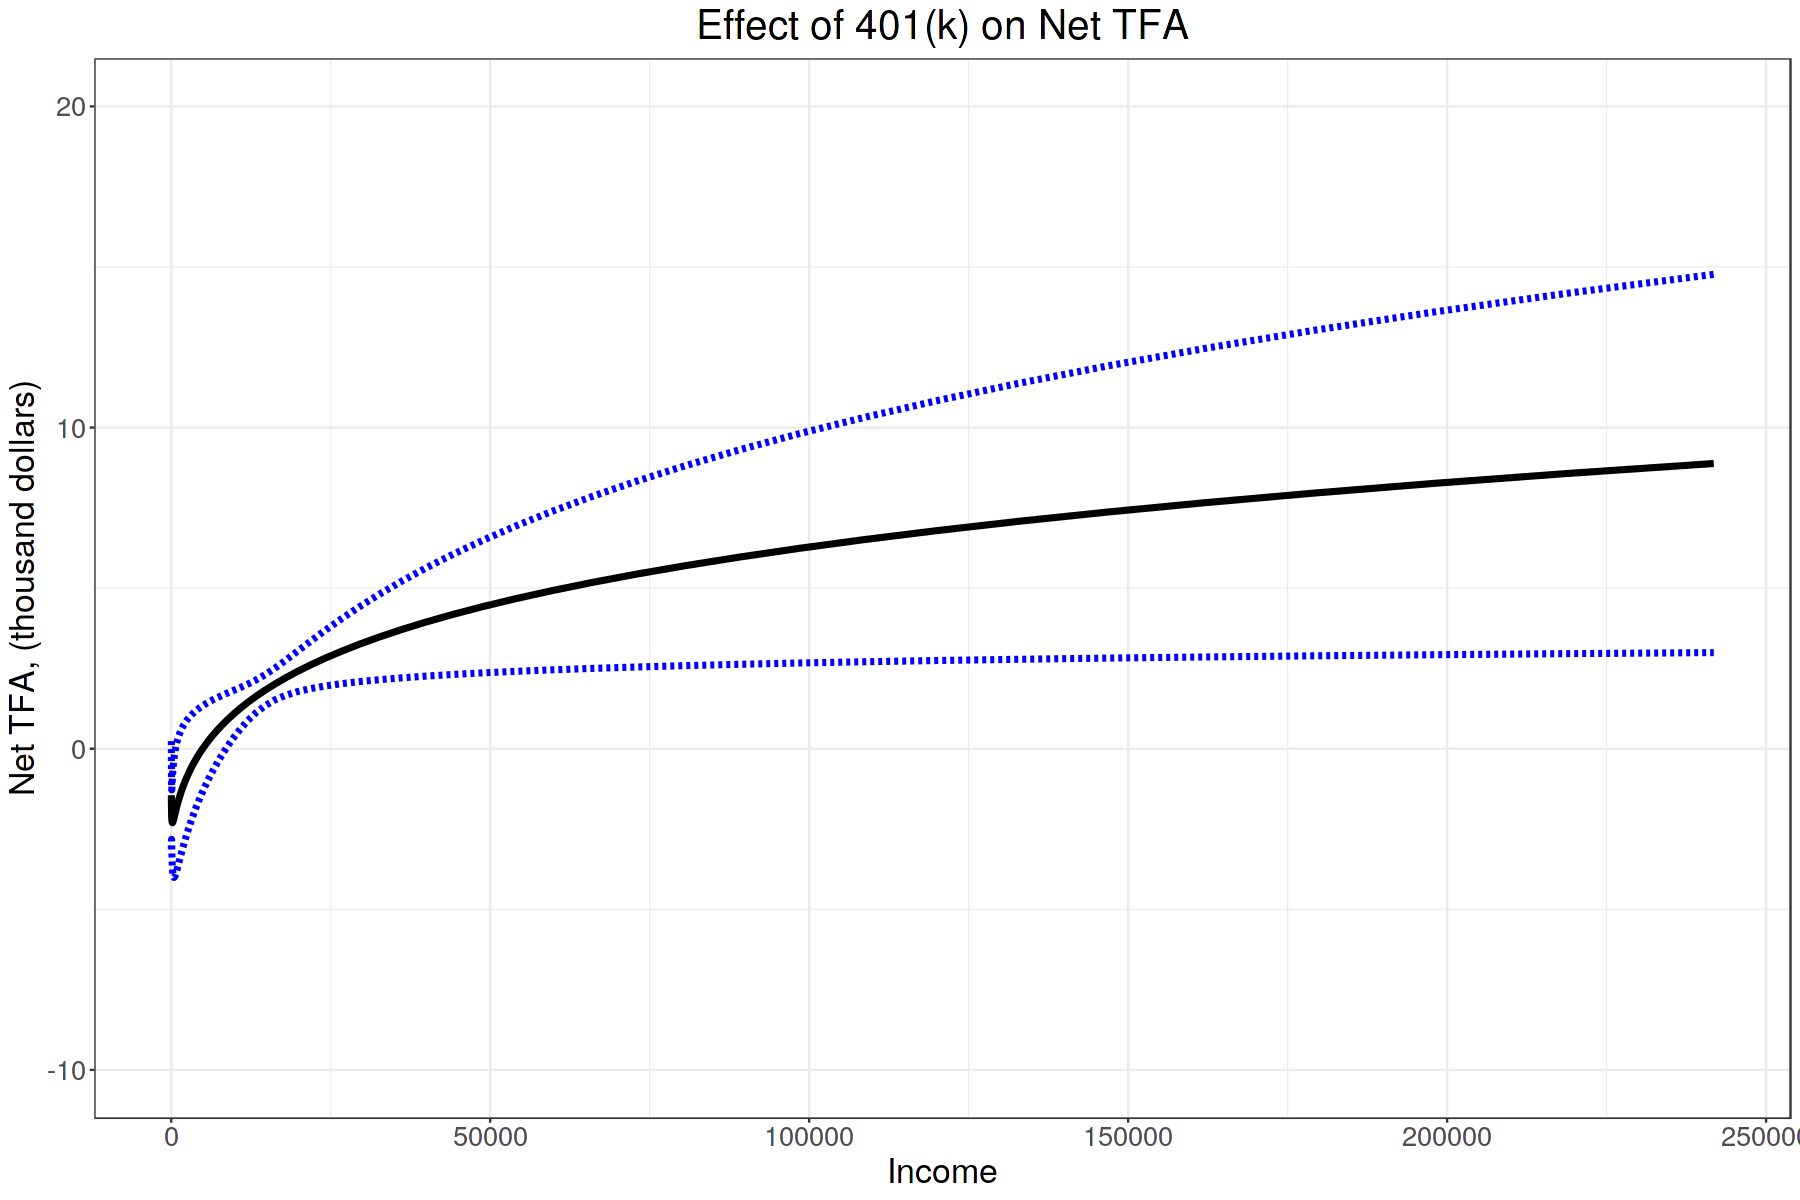

In [15]:
p<-make_plot(res_ortho_rf,degree=res_ortho_rf$degree,ss_method="ortho_poly",uniform=FALSE, lowy=-10,highy=20)
options(repr.plot.width=15, repr.plot.height=10)
print(p)

plot findings:

-- black solid line shows estimated function $p(x)' \widehat{\beta}$

-- blue dashed lines show pointwise confidence bands for this function. I.e., for each fixed point $x_0$, i.e., $x_0=1$, they cover $p(x_0)'\beta_0$ with probability 0.95

-- blue solid lines show  uniform confidence bands for this function. I.e.,  they cover the whole function $x \rightarrow p(x)'\beta_0$ with probability 0.95 on some compact range

[1] 2


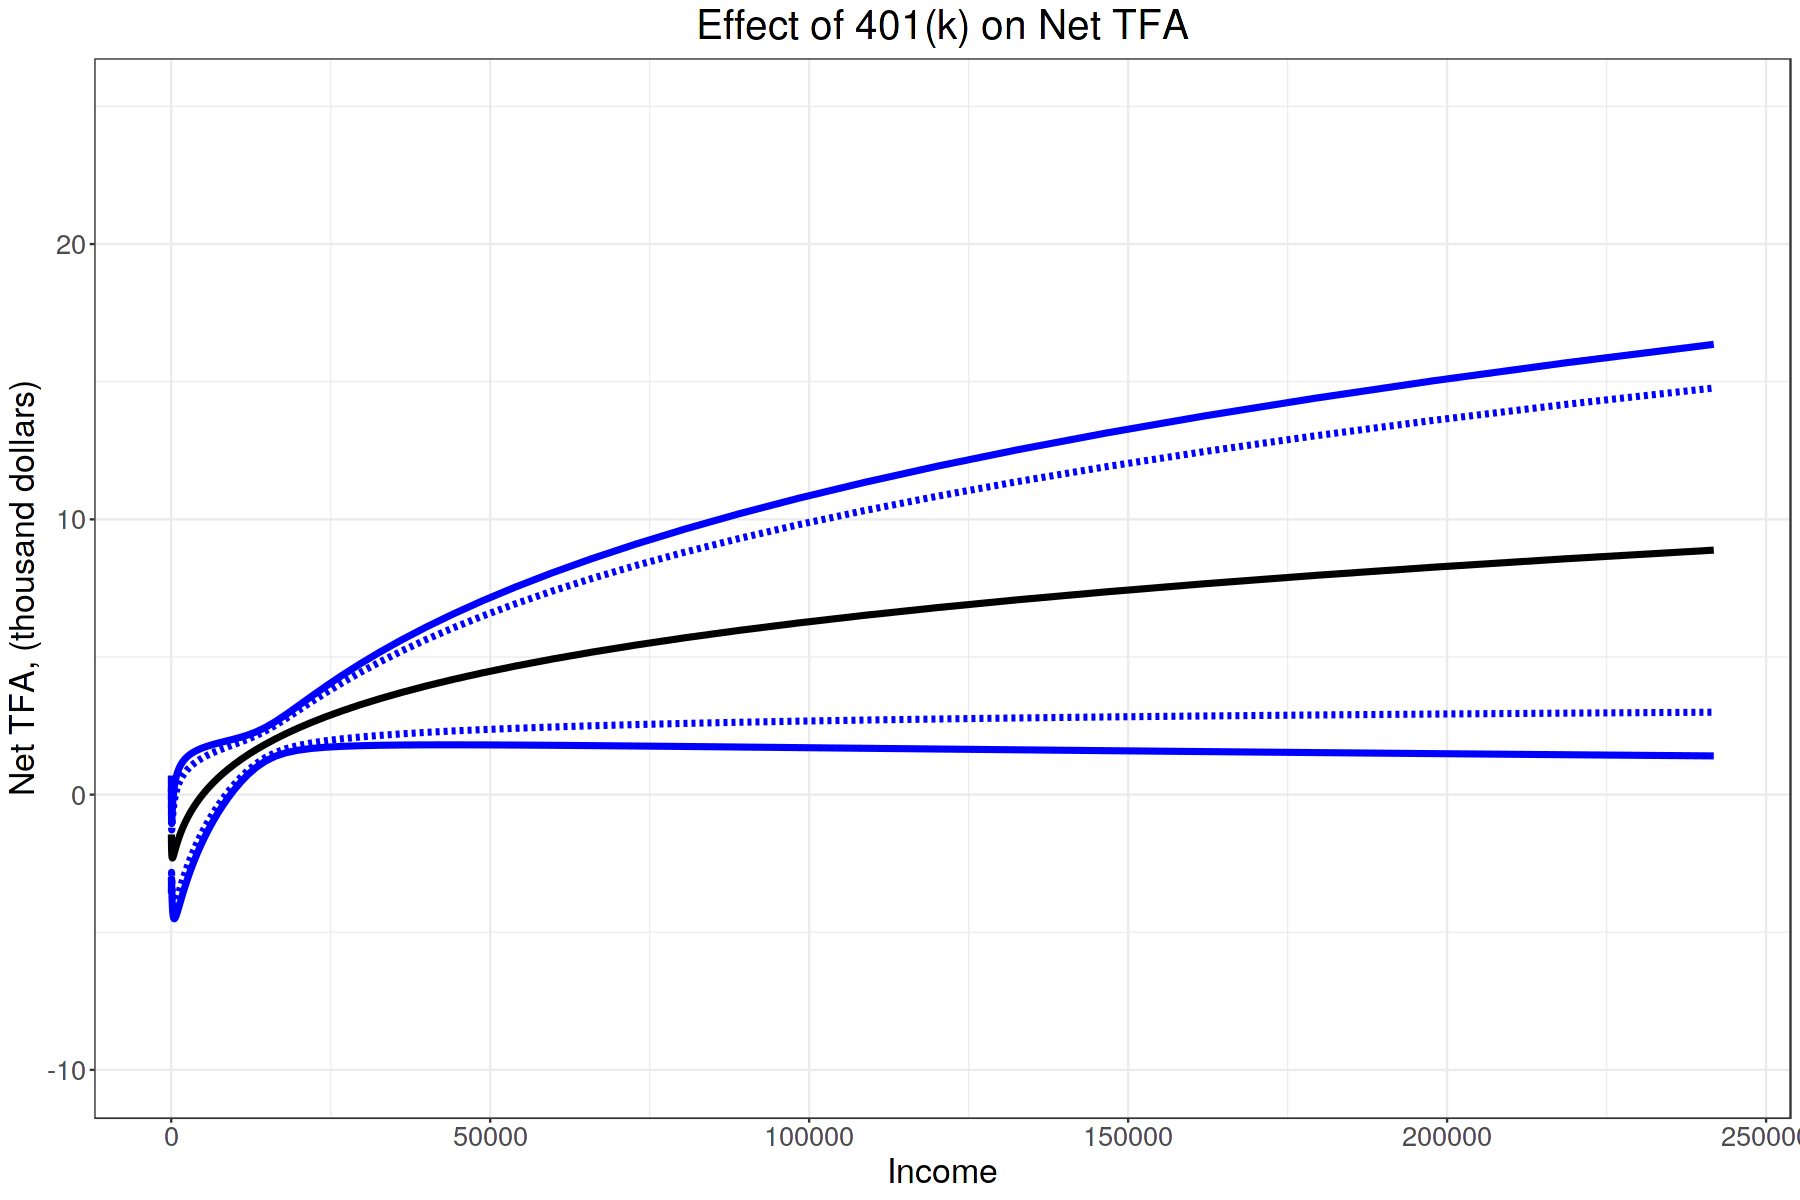

In [16]:
p<-make_plot(res_ortho_rf,degree=res_ortho_rf$degree,ss_method="ortho_poly",uniform=TRUE,lowy=-10,highy=25) 
options(repr.plot.width=15, repr.plot.height=10)
print(p)